# Fraude de Cartão de Crédito

Um estudo de Machine Learning de classificação para prever possíveis fraudes em cartão de crédito.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
dados = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

dados.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Análisando os dados

Número de transações

In [3]:
n_transacoes = dados.Class.count()
n_transacoes

284807

Número de fraudes

In [4]:
n_fraudes = dados.Class.sum()
n_fraudes

492

Número de fraudes %


In [5]:
n_fraudes_perc = round((n_fraudes/n_transacoes)*100, 2)
n_fraudes_perc

0.17

## Treinamento

Separeção dos dados de treino e de teste

In [6]:
x = dados.drop('Class', axis=1)

y = dados.Class

In [7]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.10,
                                                       random_state=0,
                                                       stratify=y)

Treinamento

In [8]:
from sklearn import tree

modelo = tree.DecisionTreeClassifier()

treino = modelo.fit(x_treino, y_treino)

In [9]:
previsao = treino.predict(x_teste)

Gráfico da arvore

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(200,100))
tree.plot_tree(treino, filled=True, fontsize=14)

plt.show()

## Métricas

**Acurácia**

Me mostra em termos percentuais o quanto o meu modelo acertou as previsões.



In [19]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(previsao, y_teste)

acuracia


0.9991573329588147

**Matriz de Confusão**

Mostra a freqência de classificação para cada classse do modelo.



In [21]:
from sklearn.metrics import confusion_matrix

matriz_de_confusao = confusion_matrix(previsao, y_teste)

matriz_de_confusao

array([[28422,    14],
       [   10,    35]])

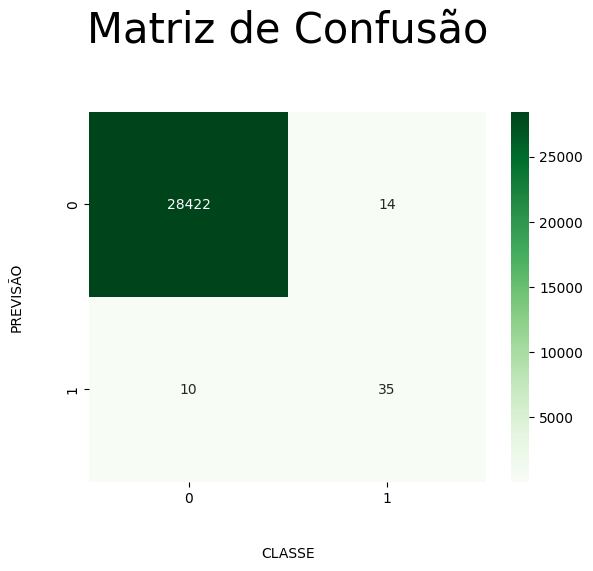

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.heatmap(matriz_de_confusao, annot=True, fmt="d", cmap="Greens")

plt.title("Matriz de Confusão", pad=50, size=30)
plt.xlabel("CLASSE", labelpad=30)
plt.ylabel("PREVISÃO", labelpad=30)


plt.show()

**Precisão**

Qual a proporção de verdadeiros estava correto?

In [25]:
from sklearn.metrics import precision_score

precisao = precision_score(previsao, y_teste)

precisao

0.7142857142857143

**Recall**

Qual proporção de positivos verdadeiros estava correto?



In [26]:
from sklearn.metrics import recall_score

recall = recall_score(previsao, y_teste)

recall

0.7777777777777778

## Parametros da arvore

**Profundidade da árvore**

Quantos niveis a arvore possui

In [27]:
print(modelo.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [28]:
print(modelo.get_depth())

21


Alteração para profundidade 10

In [29]:
modelo2 = tree.DecisionTreeClassifier(max_depth=10, random_state=0)
treino2 = modelo2.fit(x_treino, y_treino)
previsao2 = treino2.predict(x_teste)

In [30]:
print(modelo2.get_depth())

10


Métricas

In [32]:
matriz_confusao2 = confusion_matrix(previsao2, y_teste)
acuracia2 = accuracy_score(previsao2, y_teste)
precisao2 = precision_score(previsao2, y_teste)
recall2 = recall_score(previsao2, y_teste)

print(matriz_confusao2)
print(acuracia2)
print(precisao2)
print(recall2)

[[28430    13]
 [    2    36]]
0.9994733330992591
0.7346938775510204
0.9473684210526315


Número de instancias por nó

In [33]:
modelo3 = tree.DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=10)
treino3 = modelo3.fit(x_treino, y_treino)
previsao3 = treino3.predict(x_teste)


In [34]:
plt.figure(figsize=(200,100))
tree.plot_tree(modelo3, filled=True, fontsize=14)

plt.show()

In [35]:
matriz_confusao3 = confusion_matrix(previsao3, y_teste)
acuracia3 = accuracy_score(previsao3, y_teste)
precisao3 = precision_score(previsao3, y_teste)
recall3 = recall_score(previsao3, y_teste)

print(matriz_confusao3)
print(acuracia3)
print(precisao3)
print(recall3)

[[28426    12]
 [    6    37]]
0.9993679997191109
0.7551020408163265
0.8604651162790697


**Conclusão**: O desenpenho do modelo piorou com a limitação de 10 transações por nó.